In [3]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv('/content/Housing.csv.xls')

In [4]:
# 2. Data Exploration & Cleaning
print("Quick structure review:\n", df.info())  # data types + non‑null counts
print("\nSummary stats (numerical columns):\n", df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
Quick structure review:
 None

Summary stats (numerical columns):
               price          area    bedrooms   bathrooms     stories  \
count  5.45000

In [5]:

# Basic missing‑value handling — tweak to taste:
df = df.dropna()                               # simplest option: drop rows with NaNs


In [6]:
# 3. Feature Selection

target_col = "price"
cat_cols = df.select_dtypes(include="object").columns.tolist()
num_cols = [c for c in df.select_dtypes(include=[np.number]).columns
            if c != target_col]

X = df.drop(columns=[target_col])
y = df[target_col]

In [7]:
# 4. Model Training  (Linear Regression inside a preprocessing pipeline)

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),               # scale all numeric
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)  # 1‑hot all cats
    ]
)

model = Pipeline(steps=[("prep", preprocess),("lr",  LinearRegression())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['area', 'bedrooms',
                                                   'bathrooms', 'stories',
                                                   'parking']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['mainroad', 'guestroom',
                                                   'basement',
                                                   'hotwaterheating',
                                                   'airconditioning',
                                                   'prefarea',
                                                   'furnishingstatus'])])),
                ('lr', LinearRegression())])

In [8]:
# 5. Model Evaluation

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print(f"\nEvaluation on hold‑out set:")
print(f"  • Mean‑Squared Error : {mse:,.0f}")
print(f"  • R‑squared          : {r2:.3f}")


Evaluation on hold‑out set:
  • Mean‑Squared Error : 1,754,318,687,331
  • R‑squared          : 0.653


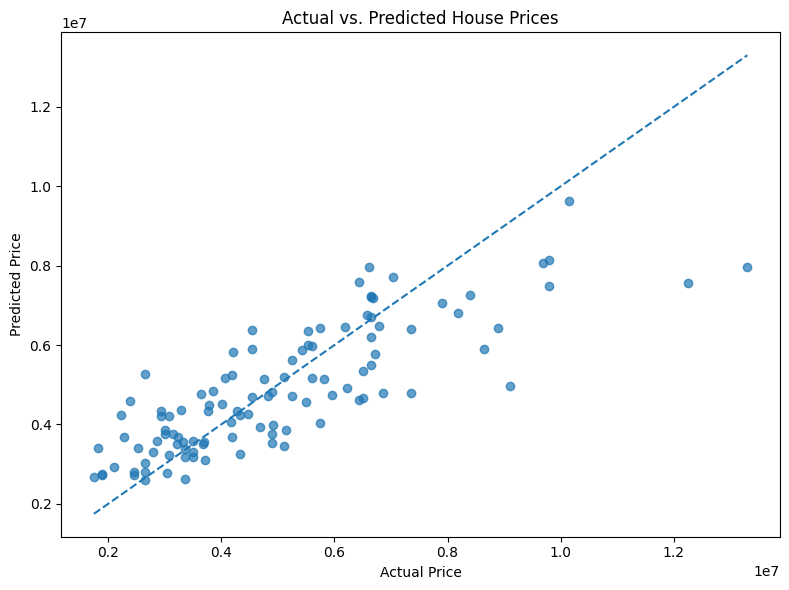

In [9]:
# 6. Visualisation

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted House Prices")

# Add a 45° reference line so perfect predictions lie on it
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, linestyle="--")

plt.tight_layout()
plt.show()
